**Course link:**  
https://openclassrooms.com/fr/courses/6401081-improve-the-performance-of-a-machine-learning-model/6401088-identify-the-problems-of-overfitting-and-underfitting

**Github repo of the course:**  
https://github.com/OpenClassrooms-Student-Center/Evaluate-Improve-Models

In this course, we will examine:
- Some of the problems exhibited by models
- Better ways to evaluate how effective our models are
- Better ways to decide what input features to use for our models
- Ways to improve the performance of your models

# 1.1/ Identify the Problems of Overfitting and Underfitting

**Understand the Bias-Variance Tradeoff**

There is a classic bulls-eye diagram by Scott Fortmann-Roe that you will see in many discussions on bias and variance. Each dot on the target is the result of an individual model. Each model is trained on different data. 

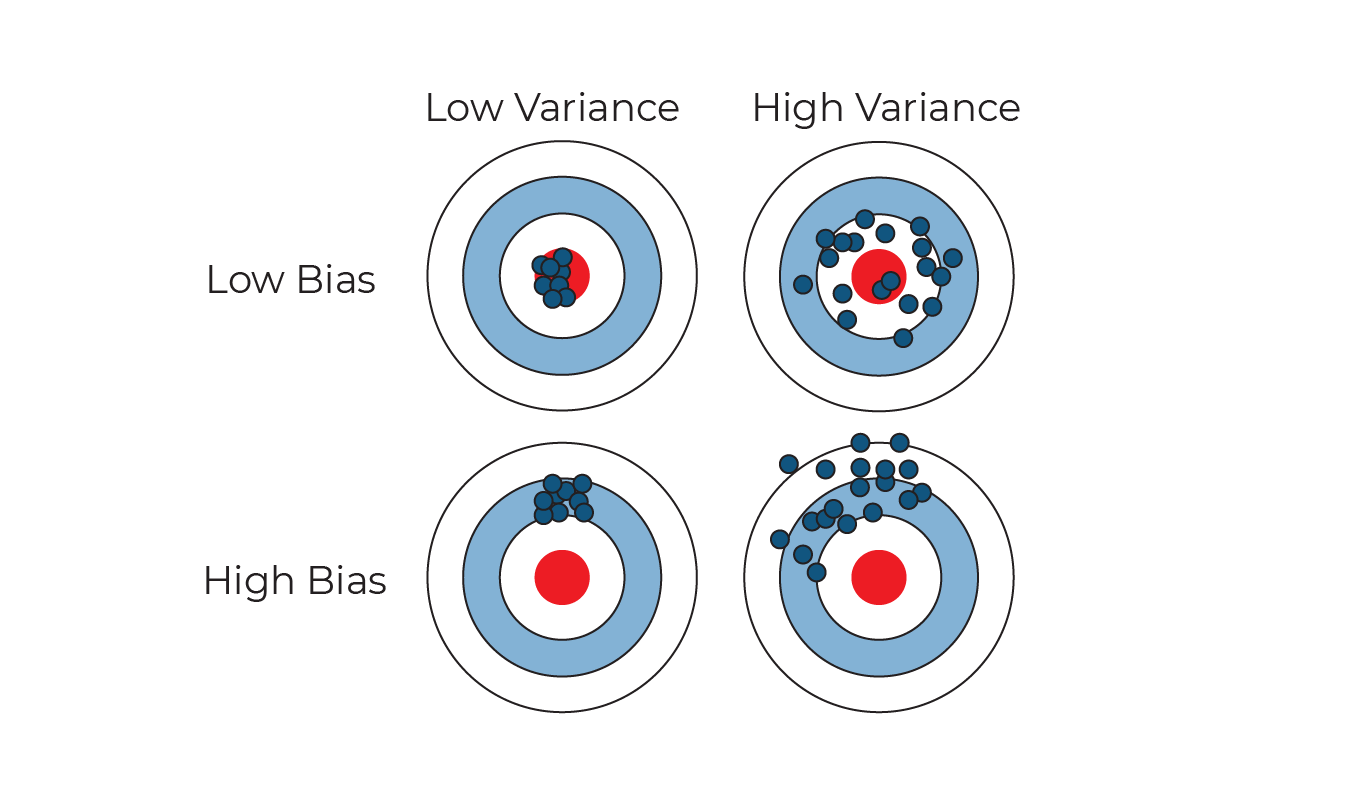

- A hit close to the bulls-eye means a good model, that makes good accurate predictions. 
- A hit away from the bulls-eye means a model that performs less well, maybe being susceptible to outliers in the data. 

An ideal algorithm for your data would minimize both bias and variance in the models it creates. This would result in models hitting the target as in the top-left target above. But if we are being realistic, it is impossible to find an approach that has zero bias and zero variance. There is always a tradeoff between bias and variance. 

**Understand Underfitting and Overfitting**

In data science, we use the terms underfitting and overfitting to describe methods that lead to models that sit outside of a good bias/variance tradeoff.
- Underfit models have high bias and low variance.
- Overfit models have low bias and high variance.

Underfitting occurs when our model is too simple to capture the complexities of the relationships in the data. A model that consistently performs poorly may be underfit.

Overfitting occurs when our model is too complex to capture the underlying relationships in the data. A model that performs well on training data, but poorly on test data is overfit.

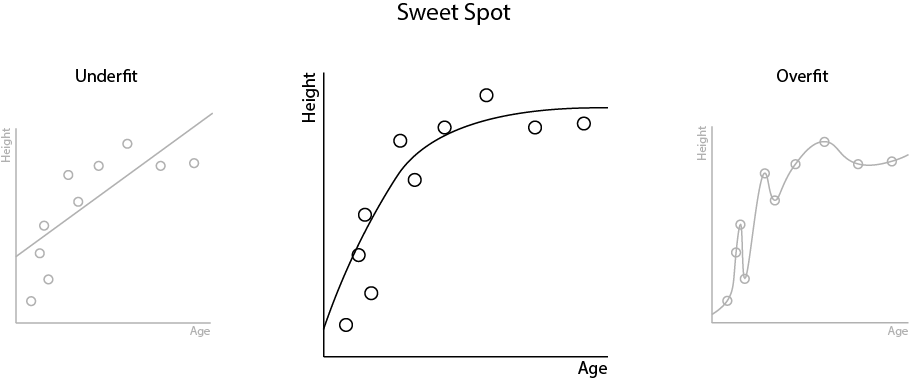

The best models will do a good job of **generalizing the underlying relationships in the data without modeling the noise** in the data.  
Here are some ways to avoid overfitting when building your models:
- Hold back a test set
- Resampling with Cross-validation 
- Feature selection
- Regularization

# 1.2/ Identify the Problem of Multicollinearity

Multicollinearity describes the situation where **features in your input set ( X) are strongly correlated with each other**, to the extent that you can predict one input feature from another input feature. Whilst this doesn't generally adversely affect the quality of your model, it can affect your ability to interpret the model.

**To spot multicollinearity:**
- spot related features
- spot repeated features
- spot dummy variables: if you have a categorical feature which you one-hot-encode (i.e. create dummy variables) you can drop the final column as it adds no additional information.
- spot highly correlated features

Use measures of correlation to understand the correlations between input features:

In [ ]:
# correlation between features 
dataset.corr()

In [ ]:
# plot a scatter matrix
pd.plotting.scatter_matrix(dataset, diagonal='kde')

In [ ]:
# display a correlation heatmap
def correlationMatrix(df):
    '''Show a correlation matrix for all features.'''
    columns = df.select_dtypes(include=['float64','int64']).columns
    fig = plt.figure(figsize=(10,10))
    ax = fig.add_subplot(111)
    cax = ax.matshow(df.corr(), vmin=-1, vmax=1, interpolation='none',cmap='RdYlBu')
    fig.colorbar(cax)
    ax.set_xticks(np.arange(len(columns)))
    ax.set_yticks(np.arange(len(columns)))
    ax.set_xticklabels(columns, rotation = 90)
    ax.set_yticklabels(columns)
    plt.show() 
    
correlationMatrix(dataset)

**Reduce Multicollinearity**  
We can look out for multicollinearity in our input features and manually remove the offending features.  
Later in the course, we will examine ways to do this more systematically using:
- Feature selection
- Algorithms that automatically remove features

# 2.1/ Evaluate the Performance of a Classification Model

**The Accuracy Score: Identify It's Limitations**

accuracy = number of correct predictions / total number of predictions

Whilst accuracy score is fine for balanced classes, it can be very misleading for unbalanced classes.

**Use a confusion matrix**

The confusion matrix is a really useful device for seeing the detail behind the classification results.   
But what we really want is a single number measure of the performance of a model that does a better job of dealing with unbalanced classes than accuracy score.

**Use Precision / Recall / F1**

Precision is calculated as follows and penalizes models with false positives:  
Precision = TP/(TP+FP)

Recall is calculated as follows and penalizes models with false negatives:  
Recall = TP/(TP+FN)

If we want a balanced measure, one that balances both precision and recall, we calculate the F1 score:  
F1 = 2∗(Precision∗Recall)/(Precision+Recall)

**Use the Receiver Operating Characteristic (ROC) Curve**

A useful evaluation technique for a classification algorithm predicting a probability would be to examine how the model behaves as its threshold moves. For binary classification problems, the Receiver Operating Characteristic curve (ROC curve) provides this technique.

We generate confusion matrices for a bunch of different thresholds on the same classification model. We can then compute two new measures from each confusion matrix, the True Positive Rate and False Positive Rate:  
- TruePositiveRate(TPR)  = TP/(TP+FN) 
- FalsePositiveRate(FPR) = FP/(FP+TN)  

So if we plot TPR against FPR we get a nice view on how well the model behaves as we adjust the threshold and hence how well the model separates the two classes:

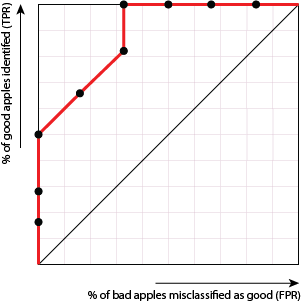

ROC curves that hug the top left corner of the chart represent models that do a good job of separating the classes.

**Use the Area Under the ROC (AUC) Curve**

Whilst the ROC curve provides a nice visual representation of the effectiveness of different models, it would be nice to have a single measure to compare the models. For this, we can compute the area under the ROC curve (called AUC, for "area under curve"). The higher the AUC the better the model.

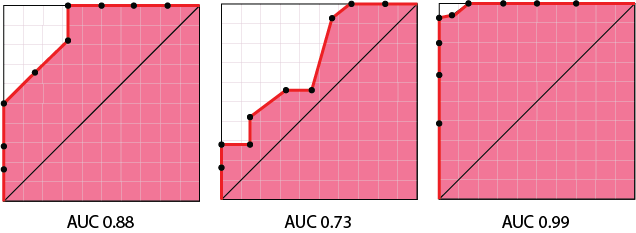

**Use Classification Evaluation Metrics with Python**

Sklearn makes using these evaluation metrics with your models very straightforward.  
A complete example of a model build and evaluation is shown below. It uses Sklearn's built-in breast cancer dataset, which can be used to experiment with building classification models to differentiate between malignant and benign cases. For full details of this (and other) built-in datasets see: https://scikit-learn.org/stable/datasets/index.html.

In [ ]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# Define a function to plot the ROC/AUC
def plotRocAuc(model, X, y):
    
    probabilities = model.predict_proba(X)
    probabilities = probabilities[:, 1]  # keep probabilities for first class only
        
    # Compute the ROC curve
    fpr, tpr, thresholds = roc_curve(y, probabilities)    
    
    # Plot the "dumb model" line
    plt.plot([0, 1], [0, 1], linestyle='--')
    
    # Plot the model line
    plt.plot(fpr, tpr, marker='.')
    plt.text(0.75, 0.25, "AUC: " + str(round(roc_auc_score(y, probabilities),2)))
    
    # show the plot
    plt.show()
    
# ROC / AUC
plotRocAuc(model, X_train, y_train)

**Balance Unbalanced Classes**

- Oversampling takes the smaller class and adds copies of a random selection of its data points until the smaller class is the same size as the larger class.
- Undersampling takes the larger class and removes some data points at random until the larger class is the same size as the smaller class.

There are, understandably, downsides to this approach. When oversampling, because we are repeating rows, there is a chance we will overfit our model. When undersampling, because we are removing potentially valuable information, we can end up with underperforming models.

# 2.2/ Evaluate the Performance of a Regression Model

**Use Mean Absolute Error (MAE)**

Mean Absolute Error (MAE) tells us the average error in units of y, the predicted feature. A value of 0 indicates a perfect fit, i.e. all our predictions are spot on. 

**Use Root Mean Square Error (RMSE)**

Its calculation is very similar to MAE, but instead of taking the absolute value to get rid of the sign on the individual errors, we square the error (because the square of a negative number is positive).  
As with MAE, we can think of RMSE as being measured in the y units, but it penalizes larger errors more severely than MAE.

**Use R-squared**

R-squared computes how much better the regression line fits the data than the mean line.  
R-squared tells us the degree to which the model explains the variance in the data. In other words, how much better it is than just predicting the mean.   
An R-squared of 1 indicates a perfect fit.   
An R-squared of 0 indicates a model no better or worse than the mean.   
An R-squared of less than 0 indicates a model worse than just predicting the mean.

To calculate these evaluation metrics with Sklearn:

In [ ]:
# MAE
mean_absolute_error(actuals, predictions)

# RMSE
sqrt(mean_squared_error(actuals, predictions)

# R-Squared
r2_score(actuals, predictions)

# 3.1/ Improve feature selection

There are three general approaches to feature selection:
- Filter methods
- Wrapper methods 
- Embedded methods

**/!\ We always apply these feature selection methods after we have performed the train_test_split.** If we don't do this we run the risk of overfitting our model.

### Filter methods

Filter methods work by ranking features based on some criteria and removing features that fall below a certain threshold.  
Univariate methods rank features independently of other features.   
Multivariate methods select features by looking at features in relation to each other. For example, we can look at the correlation between features. This can address issues like multicolinearity.   

- Remove Low Variance Features : Sklearn provides the VarianceThreshold() function to remove less important features. It uses variance as the ranking criteria.

In [ ]:
# Perform feature selection using a variance threshold
from sklearn.feature_selection import VarianceThreshold

sel = VarianceThreshold(threshold=(0.02))
sel.fit(X_train)

print("Feature selection", sel.get_support())
print("Selected features:", list(X.columns[sel.get_support()]))
print("Removed features:", list(X.columns[~sel.get_support()]))

# Transform (remove low variance features)
X_train = sel.transform(X_train)
X_test = sel.transform(X_test)

- Select Features by Strength of Relationship to Target : Sklearn provides the SelectKBest() function to select a given number of features using a univariate statistical test. The statistical test function looks for the features that have the strongest relationship with the target feature.

In [ ]:
# Perform feature selection using a univariate statistical test
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif # use this for classification tasks
from sklearn.feature_selection import f_regression # use this for regression tasks

kbest = SelectKBest(score_func=f_regression, k=3)
kbest.fit(X_train, y_train)

print("Feature selection", kbest.get_support())
print("Feature scores", kbest.scores_)
print("Selected features:", list(X.columns[kbest.get_support()]))
print("Removed features:", list(X.columns[~kbest.get_support()]))

# Transform (remove features not selected)
X_train = kbest.transform(X_train)
X_test = kbest.transform(X_test)

- Remove Highly Correlated Features :  Sklearn doesn't provide a specific function to remove highly correlated features, so we need to write some code to do this.

In [ ]:
# Function to list features that are correlated
# Adds the first of the correlated pair only (not both)
def correlatedFeatures(dataset, threshold):
    correlated_columns = set()
    correlations = dataset.corr()
    for i in range(len(correlations)):
        for j in range(i):
            if abs(correlations.iloc[i,j]) > threshold:
                correlated_columns.add(correlations.columns[i])
    return correlated_columns
# Note that it doesn't make any judgement as to which of the pair is the best one to remove. 

# Get a list of columns that have a high correlation to other columns:
cf = correlatedFeatures(X_train, 0.85)

# Remove the correlated features
X_train = X_train.drop(cf, axis=1)
X_test = X_test.drop(cf, axis=1)

### Wrapper Methods

Wrapper methods use a specific machine learning algorithm to select features that perform well.   
In contrast to filter methods, they can be very computationally intensive. For this reason, it may be best to apply a filter method first, to remove the obvious issues like low variance features, before applying these wrapper methods.

There are three general approaches:

- Forward selection  
Start with the best single feature and progressively add the best performing of the remaining features.

- Backward selection  
Start with all features and progressively remove the worst performing of the remaining features.

- Recursive Feature Elimination (RFE)  
First train the model with all the features. Then the least important feature is removed and we recursively train models with the remaining features. This is repeated until we reach the desired number of features.

In [ ]:
# Feature selection using Recursive Feature Elimimation
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

# Create a model
model = LinearRegression()

# Select the best 3 features according to RFE
rfe = RFE(model, 3)
rfe.fit(X_train, y_train)

print("Feature selection", rfe.support_)
print("Feature ranking", rfe.ranking_)
print("Selected features:", list(boston.feature_names[rfe.support_]))

# Transform (remove features not selected)
X_train = rfe.transform(X_train)
X_test = rfe.transform(X_test)

### Embedded Methods

Embedded methods select the best features as the model is being created. In this way, they are a lot more efficient than wrapper methods. Regularization methods are embedded methods that penalizes complex models. 

# 3.2/ Resample your Model with Cross-Validation

Cross-validation methods are used to provide a more robust evaluation of models. They work by splitting the dataset into multiple training and test sets and running the evaluation multiple times. 

**K-fold Cross-Validation**

K-fold cross-validation works by splitting the data into k subsets (called folds).   
A model is trained using all but one of the folds. The model is then evaluated using the unused fold, which acts as the test set.  
We can then compute an overall evaluation score by taking the mean of each model's score. In this way, we get a more robust evaluation of our models. They are less susceptible to being poorly evaluated due to the luck of the draw in the random sampling, because we've tested with 5 different cuts of the data.

In [ ]:
# Create 5 folds
seed = 7
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create a model 
model = LinearRegression()

# Train and evaluate multiple models using kfolds
results = cross_val_score(model, X, y, cv=kfold, scoring='r2')
print(results)
print("Mean:", results.mean())
print("Std:", results.std())

We can also get the predictions from the cross-validation analysis. Note that these are not actually model predictions as we are evaluating multiple models (one for each fold).

The above example uses R-squared, but you can use different evaluation metrics. You can get a list of possible evaluation metrics (for both classification and regression) by running this code:

In [1]:
from sklearn.metrics import SCORERS
sorted(SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'jaccard',
 'jaccard_macro',
 'jaccard_micro',
 'jaccard_samples',
 'jaccard_weighted',
 'max_error',
 'mutual_info_score',
 'neg_brier_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_gamma_deviance',
 'neg_mean_poisson_deviance',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'neg_root_mean_squared_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'roc_auc_ovo',
 'roc_auc_ovo_weighted',
 'roc_auc_ovr',
 'roc_auc_ovr_weighted',
 'v_measure_score']

To build our final model, we can pick the best performing algorithm, the best algorithm parameters, and the best feature set and fit a model using the entire data set.

# 3.3/ Tune your hyperparameters

In machine learning, we use the term parameters to refer to something that can be learned by the algorithm during training and hyperparameters to refer to something that is passed to the algorithm.  
**Grid search cross-validation** builds multiple models using different combinations of hyperparameters and sees which combination performs the best. To know what "best" is, we use evaluation metrics:
- for classification, we can use accuracy score, precision, recall, f1 score or roc-auc,
- for regression, we can use MAE, RMSE or R-squared.

For example, if we wanted to use KNeighborsRegressor and wanted to tune the n_neighbors hyperparameter:

In [ ]:
# Select an algorithm
algorithm = KNeighborsRegressor()

# Create 3 folds
seed = 13
kfold = KFold(n_splits=3, shuffle=True, random_state=seed)

# Define our candidate hyperparameters
hp_candidates = [{'n_neighbors': [2,3,4,5,6], 'weights': ['uniform','distance']}]

# Search for best hyperparameters
grid = GridSearchCV(estimator=algorithm, param_grid=hp_candidates, cv=kfold, scoring='r2')
grid.fit(X, y)

# Get the results
print(grid.best_score_)
print(grid.best_estimator_)
print(grid.best_params_)

# 3.4/ Improve regression with regularization

Overfitting results from having models that are too complex.  
Regularization adds a simple "lever" to our loss function. There are two variants:

Ridge (L2) regularization modifies the loss function as follows:
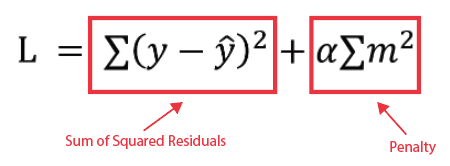

Lasso (L1) regularization modifies the loss function as follows:
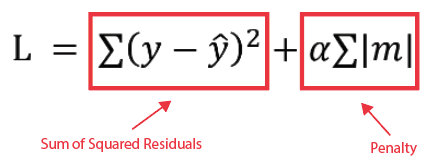

The m in the above functions are the coefficients computed by linear regression.  
In attempting to minimize the loss function during training, Ridge and Lasso regression will have the effect of shrinking the magnitude of these coefficients. This will simplify the model, reducing overfitting.

Ridge drives coefficients towards zero, but they never reach 0. Lasso can drive the coefficients all the way to zero. This means that **Lasso has embedded feature selection**. 

Note that while the total sum of all the coefficients falls as alpha increases, individual coefficients may rise as alpha increases.

Let's see how we can apply regularization in Python:

In [ ]:
### Standard Model ###

# Create model
model_lr = LinearRegression()
#Fit model
model_lr.fit(X_train, y_train)
predictions = model_lr.predict(X_train)
print("Train:", r2_score(y_train, predictions))
# Evaluate
predictions = model_lr.predict(X_test)
print("Test:", r2_score(y_test, predictions))

### Ridge Regression ###

# Create model
model_r = Ridge(alpha=2)
#Fit model
model_r.fit(X_train, y_train)
predictions = model_r.predict(X_train)
print("Train:", r2_score(y_train, predictions))
# Evaluate
predictions = model_r.predict(X_test)
print("Test:", r2_score(y_test, predictions))

### Lasso Regression ###

# Create model
model_l = Lasso(alpha=1)
# Fit model
model_l.fit(X_train, y_train)
predictions = model_l.predict(X_train)
print("Train:", r2_score(y_train, predictions))
# Evaluate
predictions = model_l.predict(X_test)
print("Test:", r2_score(y_test, predictions))

To chooose alpha, Sklearn provides dedicated functions, **RidgeCV()** for cross-validation with Ridge regression and **LassoCV()** for cross-validation with Lasso regression:

In [ ]:
# Create 5 folds
seed = 13
kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

# Create model
model_rcv = RidgeCV(cv=kfold)
model_lcv = LassoCV(cv=kfold)

#Fit model
model_rcv.fit(X_train, y_train)
predictions = model_rcv.predict(X_train)
print("Train:", r2_score(y_train, predictions))

# Evaluate
predictions = model_rcv.predict(X_test)
print("Test:", r2_score(y_test, predictions))

print("Alpha:", model_rcv.alpha_)

Lasso is useful where you have lots of features of varying significance and you want to do feature selection. Because it eliminates features, it also makes models more interpretable.  
Ridge can perform better where you have a lot of features of roughly equal importance.